In [1]:
# Условия :
gamma_0 = 5/3
p_0 = 1.694 * (10**(-4))
P_0 = 1.013 * (10**(6))
U_0 = -10**(-1)

gamma_3 = 5/3 
C_3 = 3.6537 * (10**(4))
P_3 = 1.6768 * (10**(6))
U_3 = 0

In [2]:
# Новые обозначения :
a_0 = (gamma_0 + 1)/(gamma_0 - 1)
n = 2 * gamma_3 / (gamma_3 -1)
X = P_3 / P_0
u = (U_3 - U_0)*  (  ((gamma_0-1)*p_0/2/P_0)**(0.5)  )
p_3 = gamma_3 * P_3 / (C_3**2 )
v = 2 / (gamma_3 - 1)*    (  (gamma_3*(gamma_0-1)/2 * p_0/p_3 * P_3/P_0)**(0.5)  )

# Функция f(z)

In [3]:
def f(z):
    return X**2 * z**(2*n) - a_0* v**2 * X * z**(n+2) \
        + 2*a_0*v*(u+v)*X*z**(n+1) - (2 + (u+v)**2 * a_0) * X * z**n \
        - v**2 * z**2 + 2*v*(u+v)*z - (u+v)**2 + 1 

def print_f ():
    print("f(z) = ", X**2," z^10 - ",a_0* v**2 * X," z^7 + ",2*a_0*v*(u+v)*X ,\
          " z^6 - ",(2 + (u+v)**2 * a_0) * X ," z^5 - ", v**2 , " z^2 + ", 2*v*(u+v) , " z + ", \
          -(u+v)**2 + 1 )

print_f()

f(z) =  2.739956322983837  z^10 -  4.434276774507052  z^7 +  8.868561639947997  z^6 -  7.744847550538416  z^5 -  0.6697164796898323  z^2 +  1.3394341813673842  z +  0.3302822983218907


# Локализация

In [4]:
import numpy as np
import matplotlib.pyplot as plt

### Следствие из ОТА

In [5]:
A = max(abs(a_0* v**2 * X),abs(2*a_0*v*(u+v)*X),abs((2 + (u+v)**2 * a_0) * X)\
        ,abs(v**2),abs(2*v*(u+v)), abs(1-(u+v)**2))
B = max(abs(X**2),abs(a_0* v**2 * X),abs(2*a_0*v*(u+v)*X),abs((2 + (u+v)**2 * a_0) * X)\
        ,abs(v**2),abs(2*v*(u+v)))
alpha = abs(1-(u+v)**2)/(abs(1-(u+v)**2)+B)
betta = 1 + A/abs(X**2)

print("Действительные корни лежат в кольце : ", alpha ," <= |x| <= ",betta)

Действительные корни лежат в кольце :  0.03590476156985548  <= |x| <=  4.23675292396269


### Теорема Декарта

    для положительного корня - колличество перемен знака у коэффициентов равно 4
    для отрицательного корня - колличество перемен знака у коэффициентов равно 2
Следовательно, уранение имеет 2 или 0 отрицательных корней и (4 или 2 или 0 ) положительных корней 

### Теорема Бюдана-Фурье

In [6]:
# Матрица Коэффицентов (на i строке i производная)
coefficients = np.zeros(121).reshape(11,11)
# Начальные Условия
coefficients[0][10] = X**2
coefficients[0][7] = - a_0* v**2 * X
coefficients[0][6] = 2*a_0*v*(u+v)*X
coefficients[0][5] = - (2 + (u+v)**2 * a_0) * X
coefficients[0][2] = - v**2
coefficients[0][1] =  2*v*(u+v)
coefficients[0][0] = - (u+v)**2 + 1 

for i in range(1,11,1):
    for j in range(0,10,1):

        coefficients[i][j]=coefficients[i-1][j+1]*(j+1)

In [7]:
# Функция вычисления вектора производных
def derivative_function (c):
    x = np.array([1,c,c**2,c**3,c**4,c**5,c**6,c**7,c**8,c**9,c**10])
    return coefficients @ x
    
# Функция вычисления колличества перемен знаков
def S (c):
    vector_1 = derivative_function(c)
    counter = 0
    for i in range(0,10,1):
        if(vector_1[i]*vector_1[i+1] < 0):
            counter +=1
            
    return counter
    

Так как Теорема Бюдана-Фурье дает точный ответ о количестве корней на отрезке ( в случаи , если разность равняеться 0 или 1 ) в отличии от метода Ньютона , а также работает с целыми числами (а не с малыми вещественными числами , как Ньютон ) будем использовать Фурье с бинарным поиском . Тоесть будем делить отрезок , пока разность S не будет равняться 0 или 1

In [8]:
locality_answer = set()

In [9]:
def root_area (a,b):
    if(b-a < 10**(-6)):
        return
    delta = S(a)-S(b)
    if(delta==0):
        return 
    if(delta==1):
        locality_answer.add((a,b))
        return
    else:
        root_area(a,(a+b)/2)
        root_area((a+b)/2,b)

root_area(alpha,betta)
root_area(-betta,-alpha)
print(locality_answer)

{(-0.2984577717194077, -0.03590476156985548), (-0.5610107818689599, -0.2984577717194077), (0.8235637920185122, 0.8892020445559001), (0.8892020445559001, 0.9548402970932882)}


Следовательно нашли 4 корня 

### Графическая проверка

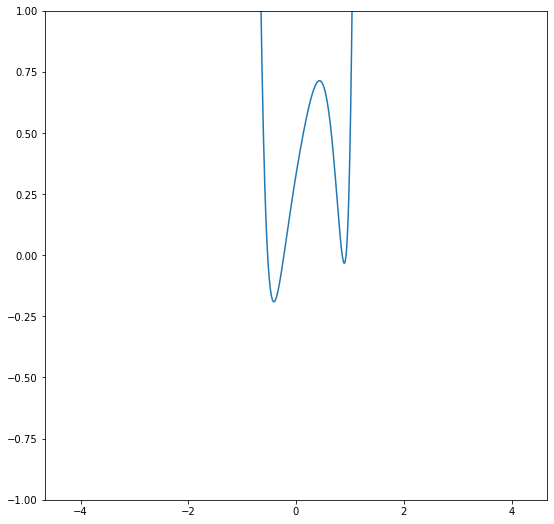

In [10]:
plt.figure (figsize=(9,9))
x = np.linspace(-betta,betta,1000)
plt.plot(x,f(x))
plt.ylim(-1,1)
plt.show()

Итог :
  Удалось локализовать все 4 корня 

# Нахождение корней

Будем искать корени методом половинного деления 

In [11]:
epsilon = 10**(-15)
def root (a,b):
    if(b-a<epsilon):
        return a
    c = (a+b)/2
    if (f(a)*f(c)<0):
        return root(a,c)
    else :
        return root(c,b)

In [12]:
answer = list()
for I in locality_answer :
    answer.append( root (I[0],I[1]) )
print(answer)

[-0.2254993710396117, -0.5275696402697247, 0.8566917210227389, 0.927957310479862]


Нашли все действительные корни , с точностью до 15-го знака !

# Возвращаемся к физической задаче

In [13]:
def Physical_task (ans):
    P_1 = P_3*ans**n
    P_2 = P_1
    print("P_1 = P_2 ",P_1)
   
    U_1 = U_3 + 2*C_3/(gamma_3-1) * (1-ans)
    U_2 = U_1
    print("U_2 = U_1 ",U_2)
    
    C_2 = C_3*ans
    print("C_2 = ",C_2)
    
    D_0 = U_0 + (P_1-P_0)/(U_1-U_0)/p_0
    print("D_0 = ",D_0)
    
    p_1 = p_0 * (U_0-D_0)/(U_1-D_0)
    print ("p_1 = ",p_1)

In [14]:
for i in answer :
    print("   ",i)
    Physical_task(i)
    print(" ")

    -0.2254993710396117
P_1 = P_2  -977.7052331279831
U_2 = U_1  134328.21155902283
C_2 =  -8239.070519674293
D_0 =  -44560.33208960377
p_1 =  4.2196683823451945e-05
 
    -0.5275696402697247
P_1 = P_2  -68529.9228451153
U_2 = U_1  167438.4358396048
C_2 =  -19275.811946534934
D_0 =  -38130.35555209668
p_1 =  3.1421429521455705e-05
 
    0.8566917210227389
P_1 = P_2  773756.1519829684
U_2 = U_1  15708.16376697656
C_2 =  31300.94541100781
D_0 =  -89908.27616625573
p_1 =  0.00014420524922248822
 
    0.927957310479862
P_1 = P_2  1153775.3410691235
U_2 = U_1  7896.671240991849
C_2 =  33904.77625300272
D_0 =  105235.72860765272
p_1 =  0.0001831428190123628
 
